In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('testovaci_dataset_BP.xlsx', sheet_name='Sheet1') 
df.sample(5) #vypisuje pocet random radku 

,Nazev,Soudni spory,Sidlo,Status,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Dlunzniky,Nespolehlivy platce,Pocet jednatelu,Ochranne znamky
23,ADOM,2,Chrastava,2,12,2,2,0,1,1,5,2,2,2,1,2
10,"FAINSTAV, s.r.o.",1,Ostrožská Nová Ves,2,21,2,9,0,1,1,19,2,2,2,2,2
8,Stanislav Mádl,2,Velké Bílovice,2,16,1,1,0,1,1,19,2,2,2,1,2
12,IBG ČESKO,2,Kralupy nad Vltavou,2,10,1,2,0,1,1,199,2,2,2,1,2
27,INVEST - P.Z. a.s.,0,Jihlava,1,21,0,0,0,0,2,0,0,0,0,0,0


In [3]:
col=[ 'Status','Soudni spory' , 'Pocet let na trhu',
       'Rust zak. kapitalu', 'Pocet jinych subjektu',
       'Jine subjekty v lividace', 'Status domeny', 'Pravni forma',
       'Pocet zamestnancu', 'Rust poctu zam.',
       'Nespolehlivy platce', 'Pocet jednatelu', 'Ochranne znamky']

In [30]:
data=df[col]

In [44]:
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 

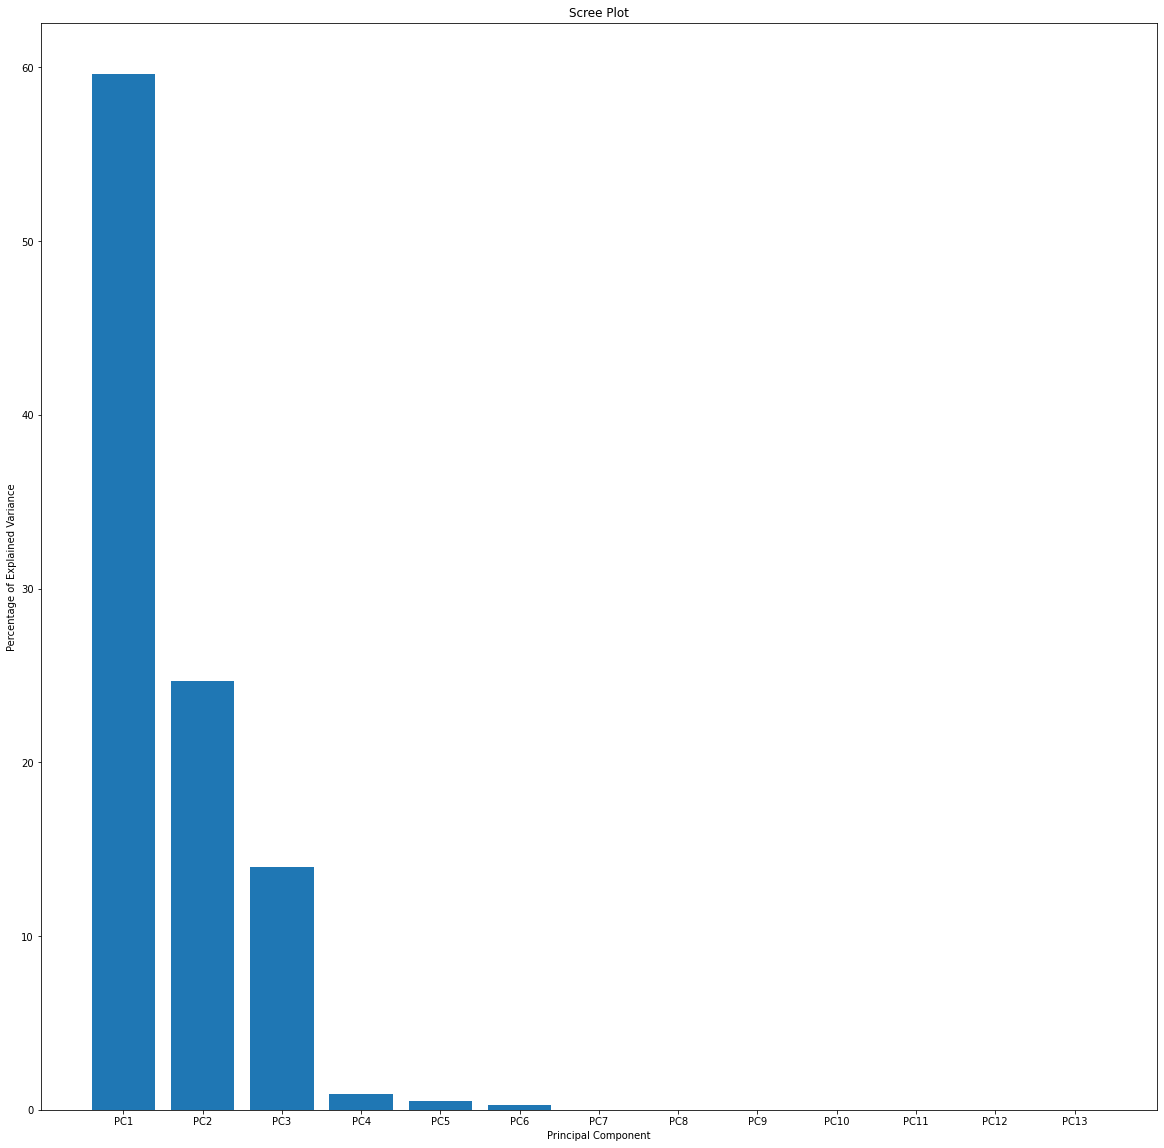

In [45]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


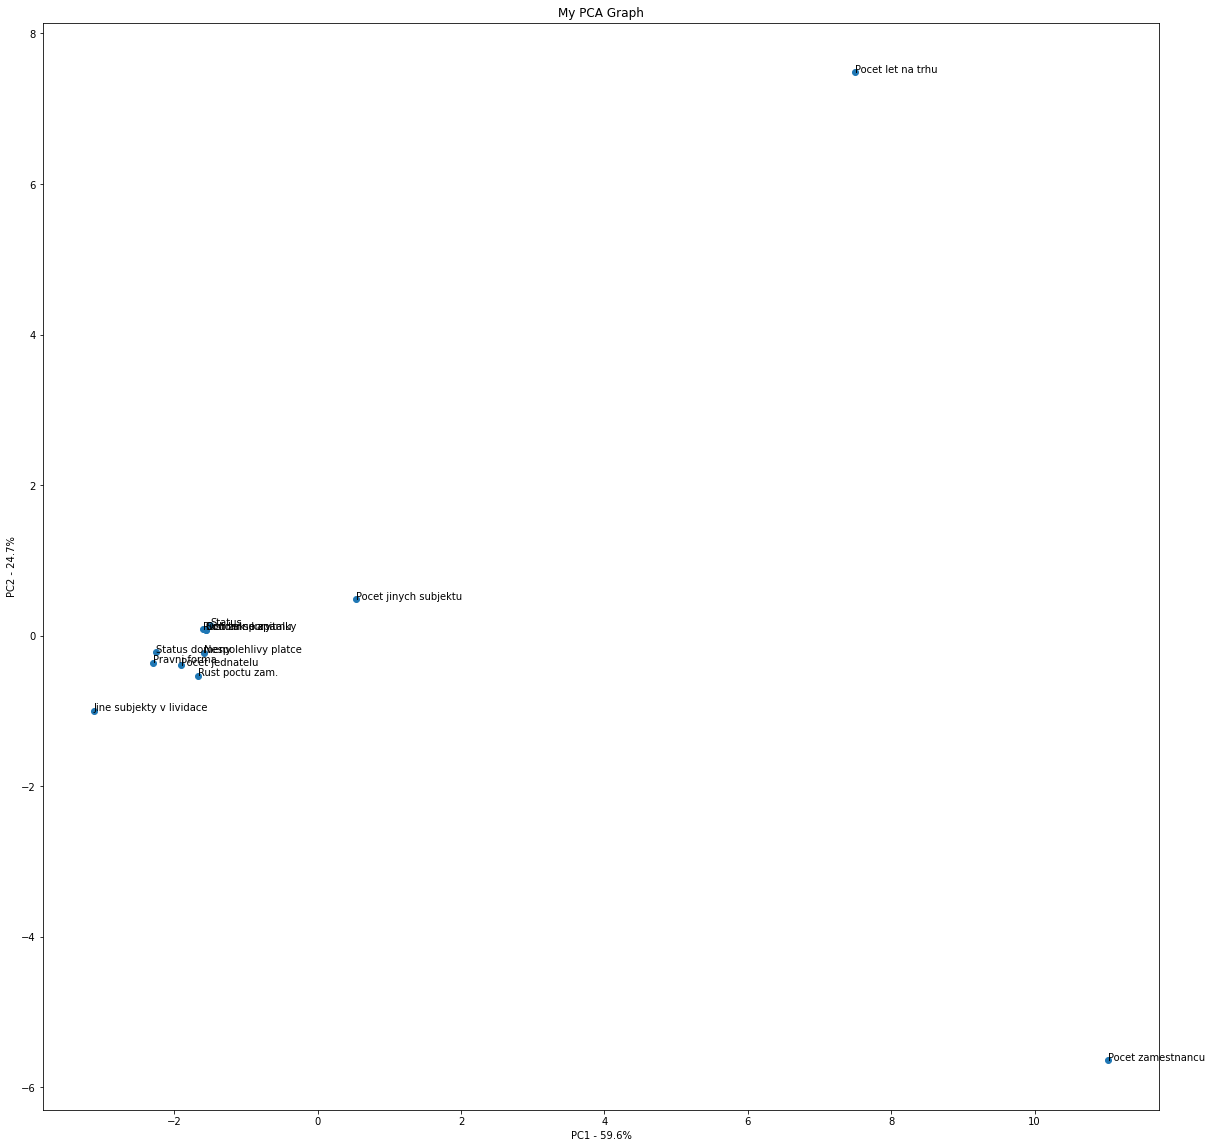

In [46]:
pca_df = pd.DataFrame(pca_data, index=['Status','Soudni spory' , 'Pocet let na trhu',
       'Rust zak. kapitalu', 'Pocet jinych subjektu',
       'Jine subjekty v lividace', 'Status domeny', 'Pravni forma',
       'Pocet zamestnancu', 'Rust poctu zam.',
       'Nespolehlivy platce', 'Pocet jednatelu', 'Ochranne znamky'], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.rcParams["figure.figsize"]=20,20
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

plt.show()
 

In [51]:
## get the name of the top 5 measurements that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=df)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 5 firms
top_5 = sorted_loading_scores[0:5].index.values
 
## print the firm names and their scores (and +/- sign)
print(loading_scores[top_5])

(AZ Elektroprojekce s.r.o., 2, Praha, 2, 22, 1, 4, 1, 1, 1, 24, 2, 2, 2, 2, 2)        0.241628
(Stanislav Mádl, 2, Velké Bílovice, 2, 16, 1, 1, 0, 1, 1, 19, 2, 2, 2, 1, 2)          0.240137
(SABIL s.r.o., 2, Brno, 2, 17, 2, 1, 0, 1, 1, 19, 2, 2, 2, 1, 2)                      0.239415
(FAINSTAV, s.r.o., 1, Ostrožská Nová Ves, 2, 21, 2, 9, 0, 1, 1, 19, 2, 2, 2, 2, 2)    0.235901
(Urbania, s.r.o., 2, Moravany, 2, 20, 2, 1, 0, 1, 1, 19, 2, 2, 2, 2, 1)               0.235677
dtype: float64


In [48]:
loading_scores = pd.Series(pca.components_[1], index=df)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_5 = sorted_loading_scores[0:5].index.values
print(loading_scores[top_5])

(Polenex, 2, Praha, 2, 9, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 2)                              0.327999
(INVEST - P.Z. a.s., 0, Jihlava, 1, 21, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0)                0.313829
(KOSMOTAU, 2, Praha, 2, 6, 2, 6, 0, 2, 1, 0, 0, 2, 1, 1, 2)                             0.276617
(LEKY , 2, Milčice, 2, 21, 2, 0, 0, 1, 1, 5, 2, 2, 2, 1, 2)                             0.268076
(Lidl Česká republika v.o.s., 1, Praha, 2, 21, 1, 38, 0, 1, 3, 10000, 1, 2, 2, 5, 1)   -0.235165
dtype: float64


In [23]:
loading_scores = pd.Series(pca.components_[2], index=df)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_5 = sorted_loading_scores[0:5].index.values
print(loading_scores[top_5])

(Česká aukční energetická , 2, Brno, 2, 4, 2, 18, 3, 2, 1, 0, 0, 2, 1, 1, 2)    0.482148
(Badec Store s.r.o., 2, Brno, 2, 2, 2, 9, 0, 2, 1, 5, 2, 2, 2, 3, 2)            0.444117
(ABL PETROVICE, 2, Petrovice, 2, 13, 2, 26, 2, 1, 1, 19, 2, 2, 2, 2, 2)         0.359232
(BUDOVA 13, 2, Zlin, 2, 16, 2, 19, 1, 1, 2, 5, 2, 2, 2, 2, 2)                   0.346463
(KOSMOTAU, 2, Praha, 2, 6, 2, 6, 0, 2, 1, 0, 0, 2, 1, 1, 2)                     0.299392
dtype: float64
